# 주제 : 롤 좀 하니? '이것'만 하면 무조건 이긴다!<br> - 데이터로 알아보는 리그 오브 레전드의 승리 공식
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 League of Legends Diamond Ranked Games (10 min) 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    high_diamond_ranked_10min.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gameId: 게임 판의 고유 ID
    blueWins: 블루팀의 승리 여부 (0: 패배, 1: 승리)
    xxxWardsPlaced: xxx팀에서 설치한 와드의 수 
    xxxWardsDestroyed: xxx팀에서 파괴한 와드의 수
    xxxFirstBlood: xxx팀의 첫번째 킬 달성 여부
    xxxKills: xxx팀의 킬 수
    xxxDeaths: xxx팀의 죽음 수
    xxxAssists: xxx팀의 어시스트 수
    xxxEliteMonsters: xxx팀이 죽인 엘리트 몬스터 수
    xxxDragons: xxx팀이 죽인 용의 수
    xxxHeralds: xxx팀이 죽인 전령의 수
    xxxTowersDestroyed: xxx팀이 파괴한 탑의 수
    xxxTotalGold: xxx팀의 전체 획득 골드
    xxxAvgLevel: xxx팀의 평균 레벨
    xxxTotalExperience: xxx팀의 총 경험치 획득량
    xxxTotalMinionsKilled: xxx팀의 총 미니언 킬 수
    xxxTotalJungleMinionsKilled: xxx팀의 총 정글 미니언 킬 수
    xxxGoldDiff: xxx팀과 다른 팀 간의 골드 획득량 차이
    xxxExperienceDiff: xxx팀과 다른 팀과의 경험치 획득량 차이
    xxxCSPerMin: xxx팀의 분당 CS 스코어
    xxxGoldPerMin: xxx팀의 분당 골드 획득량
      
    
    
- 데이터 출처: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

## 최종 목표
    - 일상에서 볼 수 있는 데이터의 활용
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로부터 인사이트 습득 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 리그 오브 레전드 데이터셋

### E-스포츠와 리그 오브 레전드


### 리그 오브 레전드 데이터셋에 관하여


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기

os.environ['KAGGLE_USERNAME'] = 'fastcampuskim'
os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [6]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기


# !kaggle datasets download -d bobbyscience/league-of-legends-diamond-ranked-games-10-min
# !unzip '*.zip'


zsh:1: command not found: kaggle
unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [7]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('/Users/lhs/Desktop/ML300/Part 1 - 머신러닝 분류 모델/Chapter 3 - 데이터로 알아보는 리그 오브 레전드의 승리 공식/high_diamond_ranked_10min.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [8]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
print(df.columns)
# print(df.describe())
df

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


100% 호환되는 값들은 제거해서 multicollinearity 가능성을 줄인다!!

### 문제 5. 각 컬럼의 Correlation 히트맵으로 시각화하기


<AxesSubplot:>

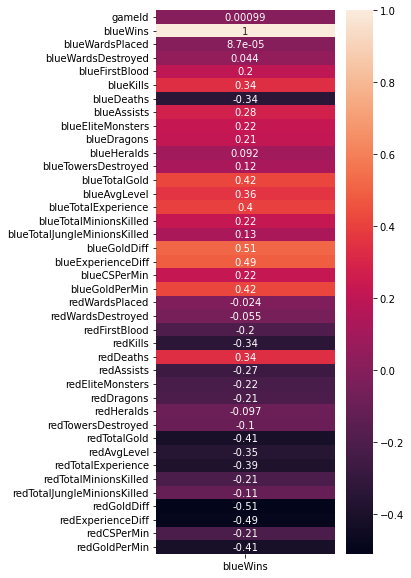

In [9]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
fig = plt.figure(figsize=(4,10))
sns.heatmap(df.corr()[['blueWins']], annot=True)


In [99]:
# multicollinearity 가능성 배제를 위해 corr값이 1 또는 -1인 컬럼 중 하나를 제거해야 한다는 것을 인지한다
# pd.set_option('display.max_columns', 40)
# df.corr()

### 문제 6. 각 컬럼과 승리 여부의 관계 시각화하기


In [10]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

<AxesSubplot:xlabel='blueGoldDiff', ylabel='Count'>

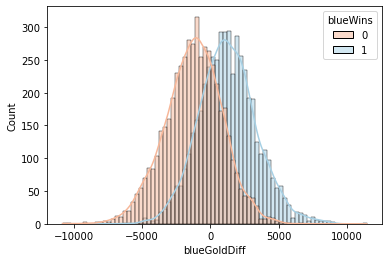

In [11]:
# Seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 승/패의 관계를 시각화
# histplot 수치형, countplot 범주형에 사용하면 됨

sns.histplot(data=df, x='blueGoldDiff', hue='blueWins', kde=True, palette='RdBu')
# sns.countplot(data=df, x='blueGoldPerMin', hue='blueWins')



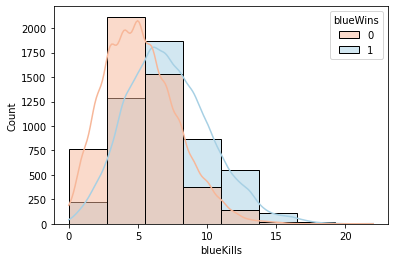

In [103]:
sns.histplot(data=df, x='blueKills', hue='blueWins', kde=True, palette='RdBu',bins=8)

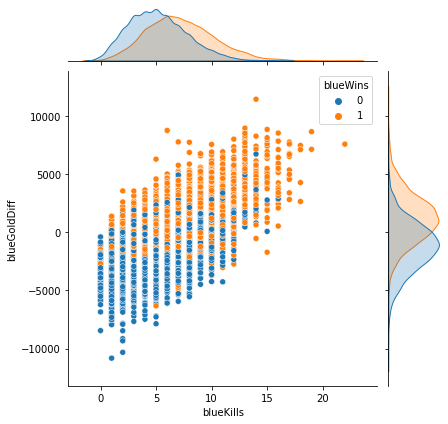

In [104]:
sns.jointplot(data=df, x='blueKills', y='blueGoldDiff', hue='blueWins')

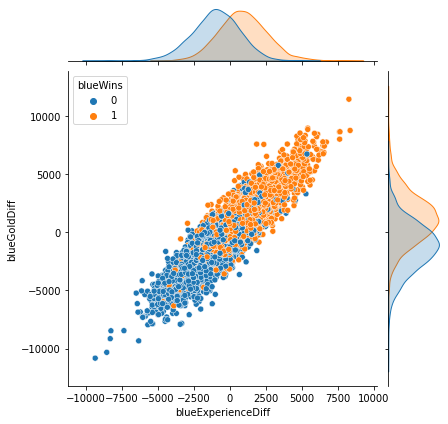

In [105]:
sns.jointplot(data=df, x='blueExperienceDiff', y='blueGoldDiff', hue='blueWins')

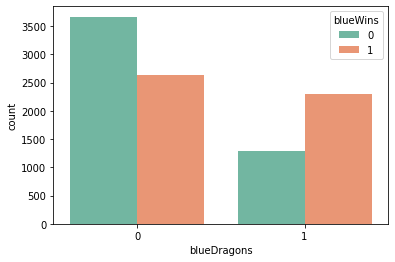

In [106]:
sns.countplot(data=df, x='blueDragons', hue='blueWins',palette='Set2')

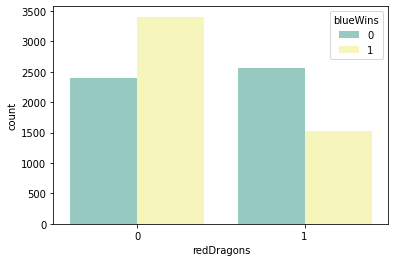

In [108]:
sns.countplot(data=df, x='redDragons', hue='blueWins',palette='Set3')

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용해 수치형 데이터 표준화하기


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [121]:
df[['blueFirstBlood','redFirstBlood']].corr()

,blueFirstBlood,redFirstBlood
blueFirstBlood,1.0,-1.0
redFirstBlood,-1.0,1.0


In [14]:
# multicollinearity 컬럼 미리 제거해 주기
df.drop(['gameId',
       'redFirstBlood', 'redKills', 'redDeaths',
       'redTotalGold', 'redTotalExperience',
       'redTotalMinionsKilled', 'redGoldDiff',
       'redExperienceDiff'], axis=1, inplace=True)

In [123]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalJungleMinionsKilled',
       'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [15]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = df[['blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redTowersDestroyed', 'redAvgLevel', 'redTotalJungleMinionsKilled',
       'redCSPerMin', 'redGoldPerMin']]

X_cat = df[['blueFirstBlood','blueDragons','blueHeralds', 'redDragons', 'redHeralds']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)

# scaled 된 값을 다시 df로 만들어주는 것이 좋다
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['blueWins']

In [129]:
X

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redTowersDestroyed,redAvgLevel,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueFirstBlood,blueDragons,blueHeralds,redDragons,redHeralds
0,0.316996,-0.379275,0.935301,-0.046926,1.071495,-0.879231,-0.210439,0.460179,-1.035635,-0.740639,-0.992782,-1.465951,0.256228,0.013342,-0.992782,0.460179,-0.399207,1.532493,0.329496,-0.914893,-0.198353,-0.410475,0.367685,-0.928741,0.052293,1,0,0,0,0
1,-0.570992,-0.839069,-0.393216,-0.387796,-0.404768,-0.879231,-0.210439,-1.166792,-1.035635,-1.385391,-1.953558,-0.758722,-1.191254,-0.593342,-1.953558,-1.166792,-0.561751,-0.805870,-1.148188,2.277700,4.412301,-0.410475,0.068504,1.033784,0.758619,0,0,0,1,1
2,-0.404494,-1.298863,0.271042,1.657424,-0.650812,0.719503,-0.210439,-0.254307,-1.691092,-1.422043,-1.404543,-0.455624,-0.483614,-0.520436,-1.404543,-0.254307,-0.399207,0.129475,1.807181,-0.914893,-0.198353,-0.410475,-2.324944,-0.654900,0.533909,0,1,0,0,0
3,1.149484,-0.839069,-0.725346,-0.387796,-0.404768,0.719503,-0.210439,-0.876959,0.275280,0.021567,-0.718275,0.453671,-0.544350,0.013863,-0.718275,-0.876959,-0.399207,-0.338198,0.822058,-0.914893,-0.198353,0.244627,-0.430131,0.805583,-0.007406,0,0,1,0,0
4,2.925460,0.540312,-0.061087,-0.046926,-0.158724,-0.879231,-0.210439,-0.067382,0.275280,0.512211,-0.306513,0.655736,-0.415133,0.137283,-0.306513,-0.067382,-0.290844,-0.338198,0.083215,0.681403,-0.198353,0.244627,1.564408,0.349182,0.613731,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,-0.293496,-0.379275,0.271042,-0.728666,-0.404768,0.719503,-0.210439,0.821656,0.930738,0.865408,-0.260762,1.868129,1.020936,1.303263,-0.260762,0.821656,1.280419,0.129475,0.083215,-0.914893,-0.198353,-0.410475,-1.726582,0.531742,-0.833801,1,1,0,0,0
9875,1.759976,-1.298863,-0.061087,-0.728666,0.333364,0.719503,-0.210439,-0.172894,0.930738,1.105315,0.745765,-0.253559,0.312888,0.479942,0.745765,-0.172894,-0.561751,8.547582,-0.901908,-0.914893,-0.198353,0.244627,0.467412,-0.517980,-0.692938,0,1,0,0,0
9876,0.039499,-0.839069,-0.061087,0.293944,-0.404768,-0.879231,-0.210439,-0.391082,0.275280,0.086541,-0.306513,-0.556657,-0.990702,-0.959957,-0.306513,-0.391082,-0.453388,-1.273543,1.068338,0.681403,-0.198353,1.554831,0.866319,1.992226,1.227490,0,0,0,1,0
9877,-0.459994,0.540312,-1.389604,-1.069536,-0.896856,0.719503,-0.210439,-1.331573,-1.035635,-0.582367,0.334004,-0.253559,-0.347874,-0.547516,0.334004,-1.331573,2.364049,0.597148,-1.394469,-0.914893,-0.198353,0.899729,-1.128220,1.353264,-0.798921,1,1,0,0,0


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)


LogisticRegression()

### 문제 10. 모델 학습 결과 평가하기


In [20]:
from sklearn.metrics import classification_report

In [21]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1480
           1       0.73      0.72      0.73      1484

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964



### 문제 11. XGBoost 모델 생성/학습하기


In [22]:
from xgboost import XGBClassifier

In [40]:
# XGBClassifier 모델 생성/학습
xgb_gridsearch_param = {'max_depth': 12,
                        'max_features': 'auto',
                        'min_samples_split': 0.01,
                        'n_estimators': 100}
model_xgb = XGBClassifier(**xgb_gridsearch_param)
model_xgb.fit(X_train, y_train)


[19:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_features='auto', max_leaves=0,
              min_child_weight=1, min_samples_split=0.01, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

### 문제 12. 모델 학습 결과 평가하기


In [41]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1480
           1       0.71      0.70      0.71      1484

    accuracy                           0.71      2964
   macro avg       0.71      0.71      0.71      2964
weighted avg       0.71      0.71      0.71      2964

[19:10:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ......clf__C=1.0, clf__gamma=100.0, clf__kernel=rbf; total time=   1.5s
[19:10:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__ga

[19:09:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ........clf__C=1.0, clf__gamma=0.1, clf__kernel=rbf; total time=   1.5s
[19:10:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ........

[19:10:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ......clf__C=1.0, clf__gamma=100.0, clf__kernel=rbf; total time=   1.5s
[19:10:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END .....clf

### 수업 외적으로 GridSearch 돌려보기

https://teddylee777.github.io/scikit-learn/grid-search-%EB%A1%9C-hyperparameter%EC%B5%9C%EC%A0%81%ED%99%94


https://datascienceschool.net/03%20machine%20learning/14.01%20%EB%AA%A8%ED%98%95%20%EC%B5%9C%EC%A0%81%ED%99%94.html

In [25]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

# param_grid = {
#     'n_estimators': [100, 150, 200, 250],
#     'max_depth': [None, 6, 9, 12],
#     'min_samples_split': [0.01, 0.05, 0.1],
#     'max_features': ['auto', 'sqrt'],
# }

In [37]:
estimator = XGBClassifier()

In [38]:
from sklearn.model_selection import KFold

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

In [39]:
# define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[18:59:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=9, max_features=sqrt, min_samples_split=0.05, n_estimators=100; total time=   2.5s
[18:59:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wr

[18:59:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=9, max_features=sqrt, min_samples_split=0.05, n_estimators=250; total time=   5.8s
[19:00:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[19:00:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=9, max_features=sqrt, min_samples_split=0.1, n_estimators=150; total time=   3.6s
[19:00:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[

[19:00:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=9, max_features=sqrt, min_samples_split=0.1, n_estimators=200; total time=   4.7s
[19:00:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[

[19:00:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=9, max_features=sqrt, min_samples_split=0.1, n_estimators=200; total time=   4.7s
[19:00:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[

[19:02:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=12, max_features=sqrt, min_samples_split=0.05, n_estimators=100; total time=   3.3s
[19:02:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



[19:02:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=12, max_features=sqrt, min_samples_split=0.05, n_estimators=200; total time=   6.3s
[19:02:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



[19:02:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=12, max_features=sqrt, min_samples_split=0.05, n_estimators=250; total time=   7.6s
[19:02:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



[19:02:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=12, max_features=sqrt, min_samples_split=0.05, n_estimators=250; total time=   7.7s
[19:02:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



[19:02:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=12, max_features=sqrt, min_samples_split=0.1, n_estimators=200; total time=   6.4s
[19:03:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[19:02:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=12, max_features=sqrt, min_samples_split=0.1, n_estimators=200; total time=   6.3s
[19:02:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[19:02:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=12, max_features=sqrt, min_samples_split=0.1, n_estimators=250; total time=   7.6s
[CV] END .................................................... total time=   1.5s
[19:08:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flag

[19:09:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ....clf__C=0.001, clf__gamma=0.001, clf__kernel=rbf; total time=   1.5s
[19:09:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END .....clf

[19:09:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END .....clf__C=0.001, clf__gamma=0.01, clf__kernel=rbf; total time=   1.6s
[19:09:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END .....clf

[19:09:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ......clf__C=0.001, clf__gamma=0.1, clf__kernel=rbf; total time=   1.6s
[19:09:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ......cl

[19:09:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ....clf__C=0.01, clf__gamma=1000.0, clf__kernel=rbf; total time=   1.6s
[19:09:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END .....clf

[19:09:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ....clf__C=0.001, clf__gamma=100.0, clf__kernel=rbf; total time=   1.6s
[19:09:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ...clf__

[19:09:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ...clf__C=0.001, clf__gamma=1000.0, clf__kernel=rbf; total time=   1.6s
[19:09:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__gamma", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ....clf_

[19:10:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "clf__C", "clf__kernel" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constrain...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                         100.0, 1000.0],
                          'clf__kernel': ['rbf']}],
             verbose=2)

In [30]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 'auto',
 'min_samples_split': 0.01,
 'n_estimators': 100}

gridsearch 돌렸는데 왜 점수가 내려간 것이지..?

## Step5 모델 학습 결과 심화 분석하기


### 문제 13. Logistic Regression 모델 계수로 상관성 파악하기

In [74]:
# Logistic Regression 모델의 coef_ 속성을 plot하기

model_lr.coef_.shape

(1, 37)

<BarContainer object of 37 artists>

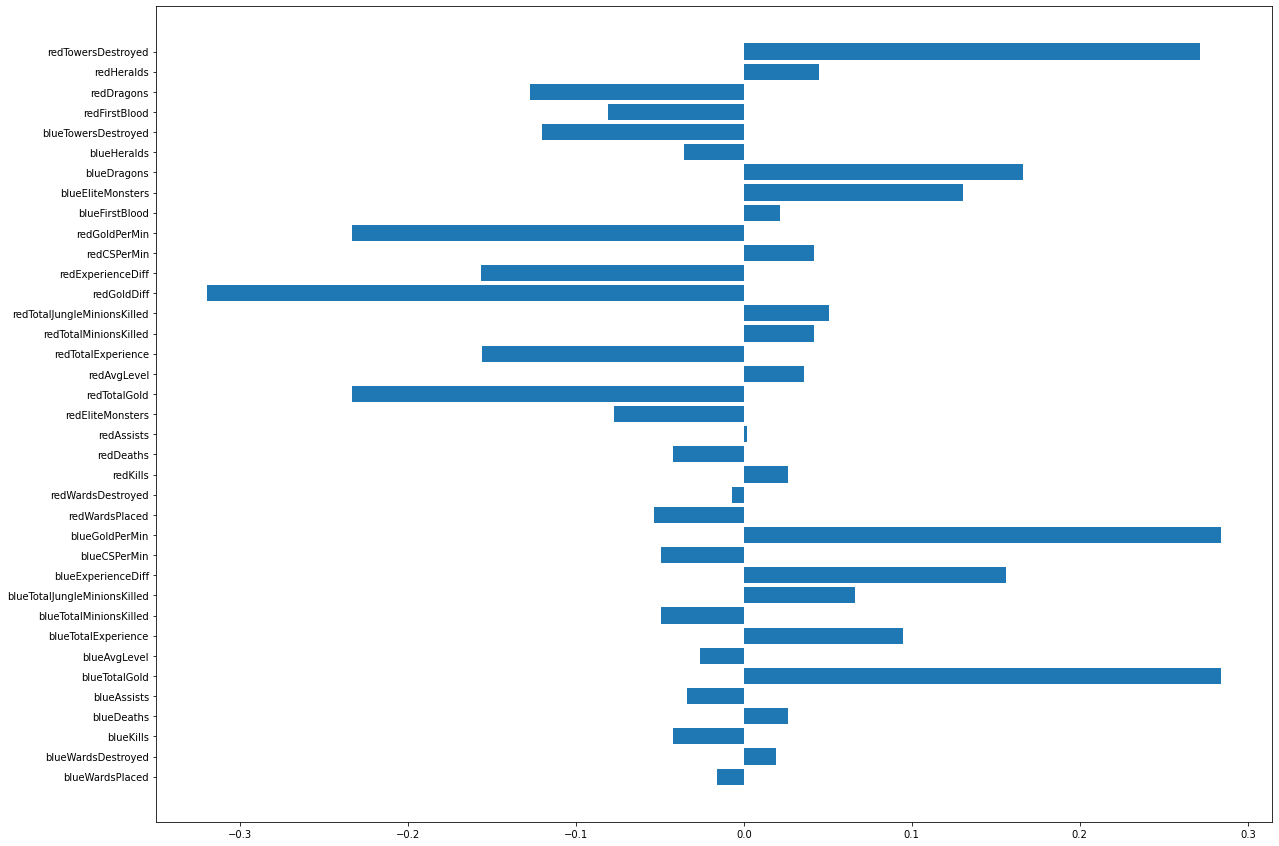

In [75]:
fig = plt.figure(figsize=(20,15))
plt.barh(X.columns, model_lr.coef_[0,:])

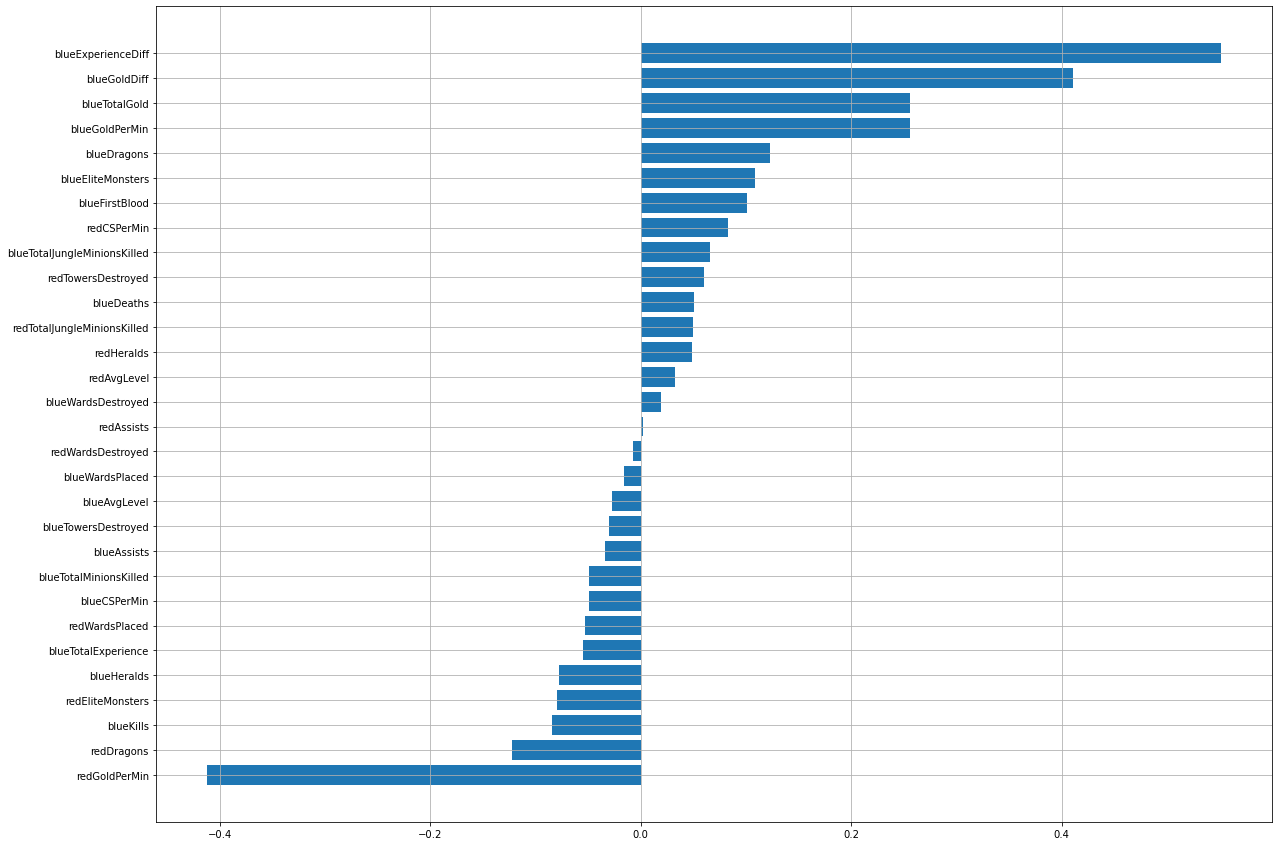

In [44]:
# 정렬 해 보리~

fig = plt.figure(figsize=(20,15))
# sorting 작업 
model_coef = pd.DataFrame(data=model_lr.coef_[0], index=X.columns, columns=['Model Coefficient'])
model_coef.sort_values(by='Model Coefficient', ascending=True, inplace=True)
plt.barh(model_coef.index, model_coef['Model Coefficient'])
plt.grid()
plt.show()

### 문제 14. XGBoost 모델로 특징의 중요도 확인하기

<BarContainer object of 30 artists>

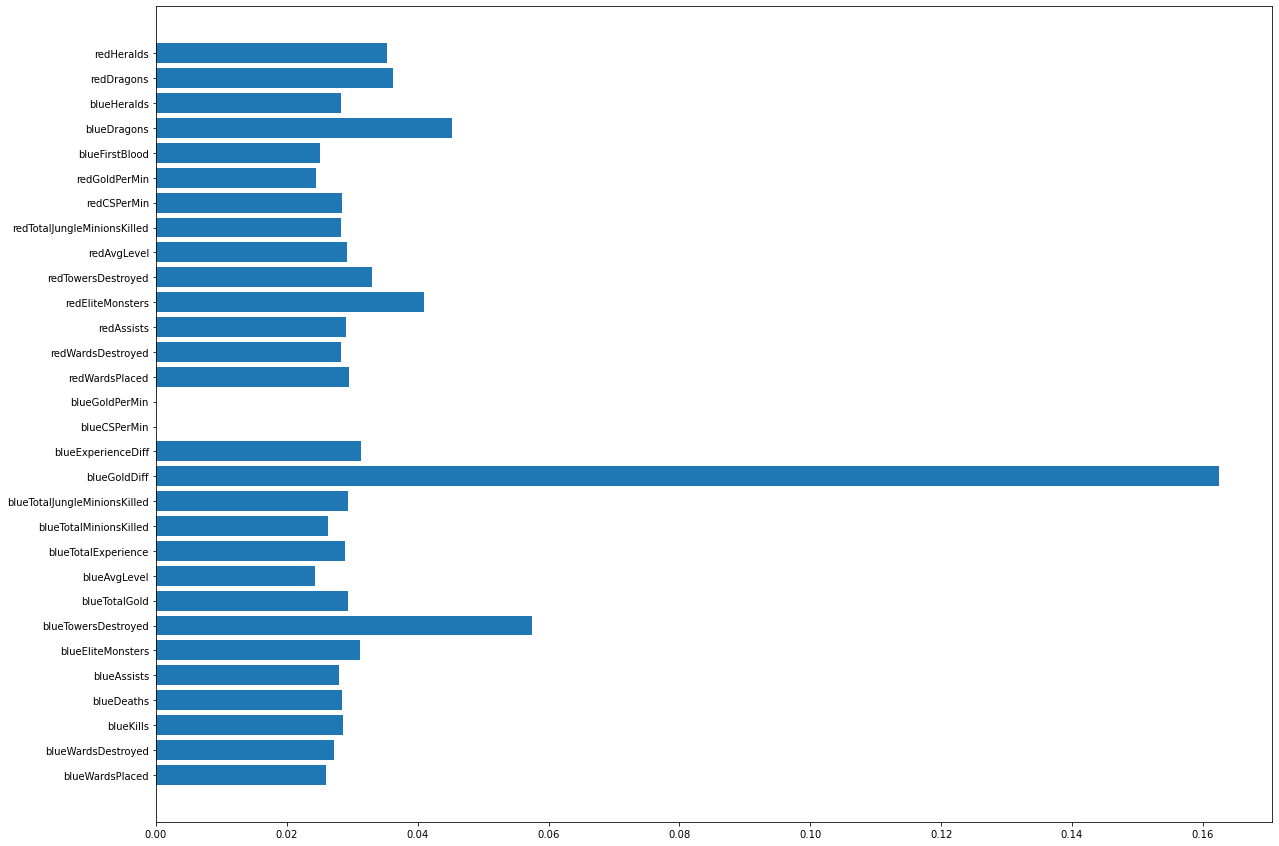

In [42]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기

fig = plt.figure(figsize=(20,15))
plt.barh(X.columns, model_xgb.feature_importances_)



<BarContainer object of 30 artists>

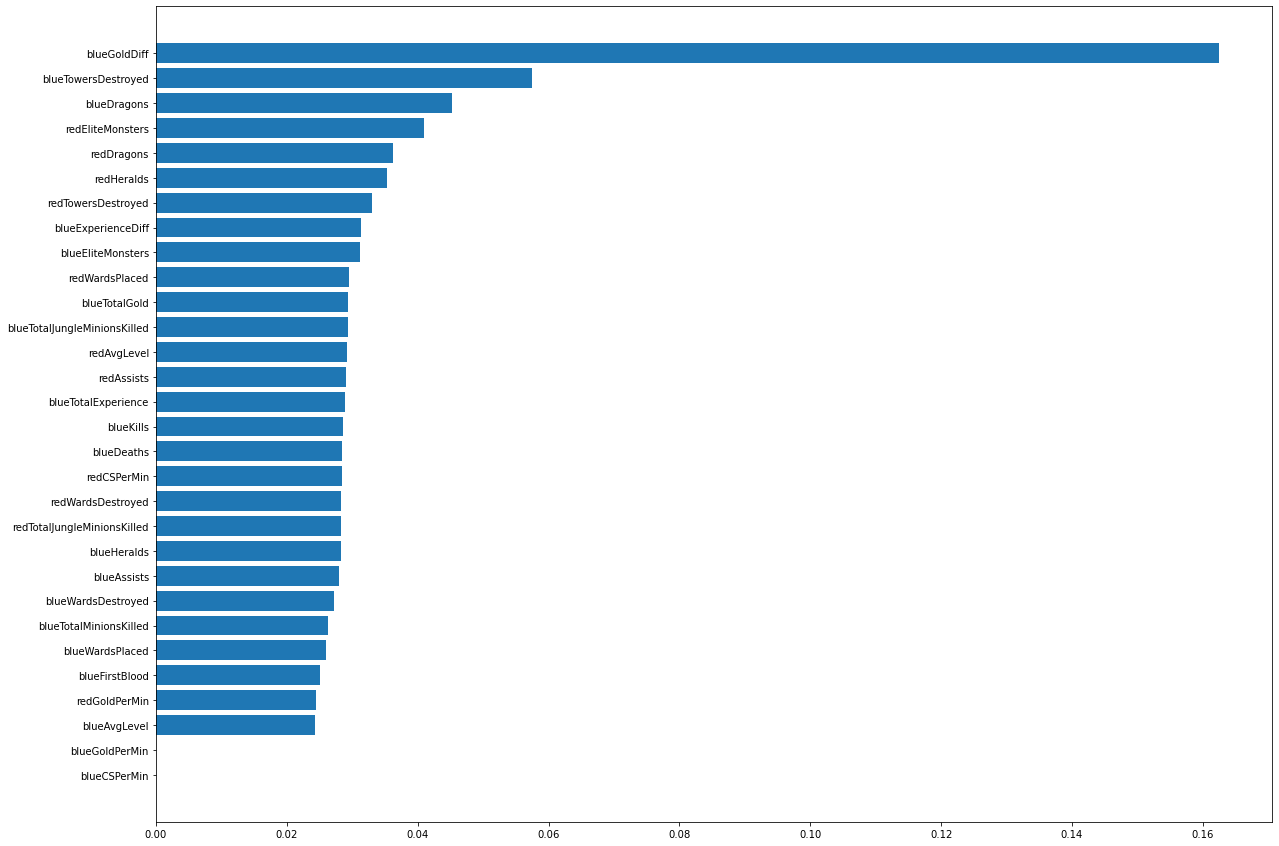

In [43]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기

# 정렬 해 보리기

fig = plt.figure(figsize=(20,15))
model_imp = pd.DataFrame(data=model_xgb.feature_importances_, index=X.columns, columns=['Feature Importance'])
model_imp.sort_values(by='Feature Importance', ascending=True, inplace=True)
plt.barh(model_imp.index, model_imp['Feature Importance'])
